In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
import random
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import ScalarFormatter


In [2]:
from sparrow import Protein
from goose import create
from afrc import AnalyticalFRC

valid_aas = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


In [3]:
gs = 'GS'
aro = 'Y'
n_repeats=8



final = []

all_gs_len = []
all_aro_len = []
all_rg = []
for gs_len in range(1,60):
    for aro_len in range(0,10):
        
        seq = (gs*gs_len + aro*aro_len)*n_repeats
        rg_afrc = AnalyticalFRC(seq).get_mean_radius_of_gyration()
        rg_pred = Protein(seq).predictor.radius_of_gyration(use_scaled=True)
        all_rg.append(rg_pred/rg_afrc)
        
        all_aro_len.append(aro_len)
        all_gs_len.append(gs_len)
    


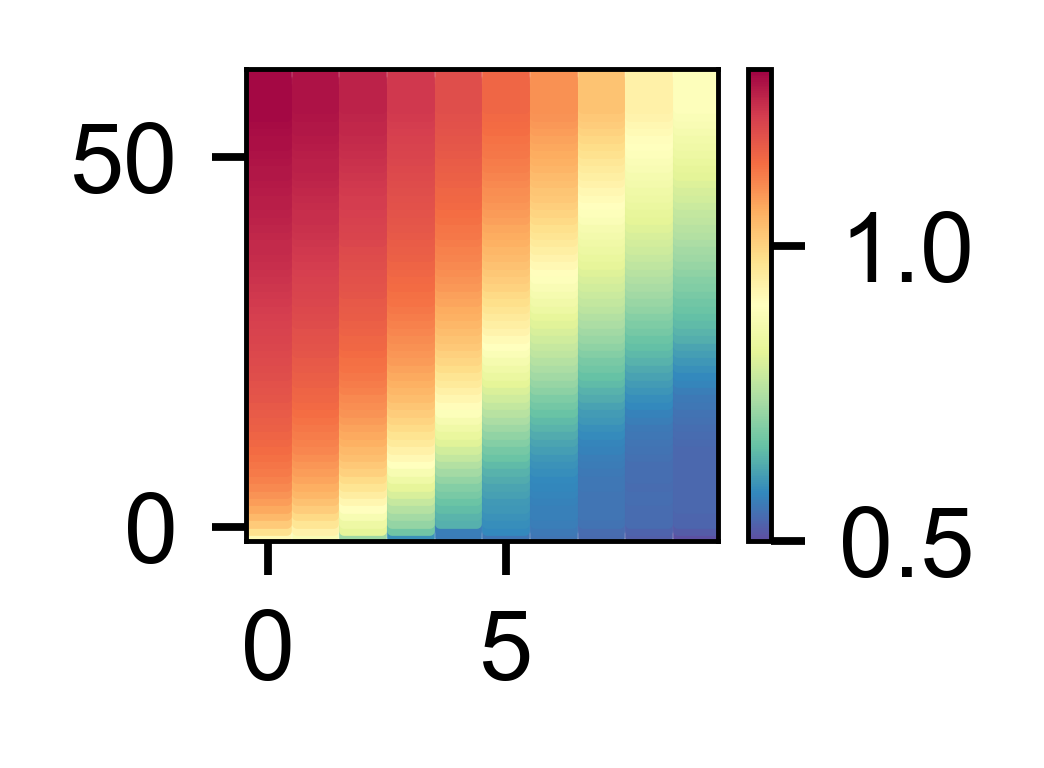

In [12]:
fig = figure(None, (1.55,1.2), dpi=350)
plt.scatter(all_aro_len, all_gs_len, c=all_rg, marker='s', s=15, cmap='Spectral_r', rasterized=True,  vmin=0.5, vmax=1.3)
plt.colorbar()
plt.tight_layout()
with PdfPages('figures/tyr_sticker_spacer.pdf') as pdf:
    pdf.savefig(fig, dpi=950)

